In [12]:
import matplotlib.pyplot as plt
import torch 

from src.splats.rasterization import Rasterizer
from src.splats.config import Config
from gsplat import DefaultStrategy, MCMCStrategy

In [2]:
configs = {
        "default": (
            "Gaussian splatting training using densification heuristics from the original paper.",
            Config(
                strategy=DefaultStrategy(verbose=True),
            ),
        ),
        "mcmc": (
            "Gaussian splatting training using densification from the paper '3D Gaussian Splatting as Markov Chain Monte Carlo'.",
            Config(
                init_opa=0.5,
                init_scale=0.1,
                opacity_reg=0.01,
                scale_reg=0.01,
                strategy=MCMCStrategy(verbose=True),
            ),
        ),
    }
cfg = configs["default"][1]

In [3]:
rasterizer = Rasterizer("../results/south-building/epochs_30_000/ckpts/ckpt_29999_rank0.pt", cfg)

[Parser] 128 images, taken by 1 cameras.


In [4]:
rasterizer.parser.camtoworlds.shape

(128, 4, 4)

In [5]:
rasterizer.parser.Ks_dict

{1: array([[2.59577608e+03, 0.00000000e+00, 1.53600000e+03],
        [0.00000000e+00, 2.59577608e+03, 1.15200000e+03],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])}

In [6]:
rasterizer.parser.imsize_dict[1]

(3072, 2304)

In [7]:
torch.cuda.is_available()

True

In [14]:
render_colors, render_alphas, info = rasterizer.rasterize_splats(
    camtoworlds=torch.tensor(rasterizer.parser.camtoworlds[10], device="cuda:0", dtype=torch.float32)[None, :, :],
    Ks=torch.tensor(rasterizer.parser.Ks_dict[1], device="cuda:0", dtype=torch.float32)[None, :, :],
    height=rasterizer.parser.imsize_dict[1][0],
    width=rasterizer.parser.imsize_dict[1][1],
)

In [15]:
render_colors.shape

torch.Size([1, 3072, 2304, 3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.00029966683..2.0395243].


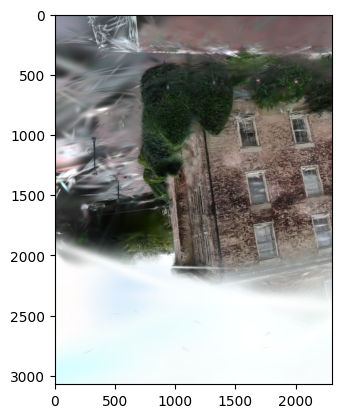

In [16]:
plt.imshow(render_colors.cpu()[0])